In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc


# **Preprocessing notebook**

This notebook produces open the data, and produces the adta_hexagon file  
It contains the spatial coordinates of the hexagon and prepares the data that  
will be used in the next stage of the analysis


In [2]:
# import file from local directory, txt file with pandas
df = pd.read_csv("GSE118403_counts.txt", sep="\t", header=None)

# import file from local directory, txt filem with pandas
df2 = pd.read_csv("SraRunTable.txt", sep=",", header=None)
df

/var/folders/8w/hhwzbx0d6zg_2q5hrl31_yn00000gq/T/ipykernel_56356/296501402.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('GSE118403_counts.txt', sep='\t', header=None)


,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,gene_id,A-10,A-11,A-1,A-2,A-3,A-4,A-5,A-6,A-8,...,G-N710,G-N711,G-N712,H-N701,H-N702,H-N703,H-N704,H-N705,H-N707,H-N711
1,ENSMUSG00000051951.5,16,55,64,20,3,6,46,12,6,...,3,146,4,41,14,0,2,20,0,40
2,ENSMUSG00000102343.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ENSMUSG00000025900.12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENSMUSG00000025902.13,4,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27511,ENSMUSG00000065947.3,3,8,0,4,2,4,3,7,5,...,6,8,30,17,0,8,0,2,4,6
27512,ENSMUSG00000064363.1,718,1423,881,458,655,623,741,1258,344,...,1057,2268,3962,2097,1253,1864,734,980,1046,1153
27513,ENSMUSG00000064367.1,1097,2720,1749,763,1072,1067,1377,1925,535,...,1373,3369,5899,3271,1551,2549,933,1515,1502,1754
27514,ENSMUSG00000064368.1,188,279,140,94,103,79,121,203,67,...,218,492,744,440,246,477,108,197,260,214


In [3]:
# saving values of first row, it's important to use .values
row_names = df.iloc[:, 0][1:].values
print(row_names.shape)
col_names = df.iloc[0, :][1:].values
print(col_names.shape)
# delete third column
df = df.drop(df.columns[0], axis=1)
# delete first row
df = df.drop(df.index[0])

# changing row and column names
df.index = row_names
df.columns = col_names
df

(27515,)
(82,)


,A-10,A-11,A-1,A-2,A-3,A-4,A-5,A-6,A-8,A-9,...,G-N710,G-N711,G-N712,H-N701,H-N702,H-N703,H-N704,H-N705,H-N707,H-N711
ENSMUSG00000051951.5,16,55,64,20,3,6,46,12,6,19,...,3,146,4,41,14,0,2,20,0,40
ENSMUSG00000102343.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000025900.12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000025902.13,4,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000104328.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000065947.3,3,8,0,4,2,4,3,7,5,3,...,6,8,30,17,0,8,0,2,4,6
ENSMUSG00000064363.1,718,1423,881,458,655,623,741,1258,344,782,...,1057,2268,3962,2097,1253,1864,734,980,1046,1153
ENSMUSG00000064367.1,1097,2720,1749,763,1072,1067,1377,1925,535,1291,...,1373,3369,5899,3271,1551,2549,933,1515,1502,1754
ENSMUSG00000064368.1,188,279,140,94,103,79,121,203,67,172,...,218,492,744,440,246,477,108,197,260,214


In [4]:
gene_code = df.index.values
# save gene names to a txt file, removing the quotation marks, and remove the . and the digits after it
gene_code = [i.split(".")[0] for i in gene_code]
# saving the gene names file, than translated it to the gene names on a website
# np.savetxt('gene_code.txt', gene_code, fmt='%s')

# first column is the gene name, second column is the gene symbol
gene_conv = np.loadtxt("conversion.txt", dtype=str, delimiter="\t")
gene_conv.shape

# finally change the index of the dataset to the gene symbol
df.index = gene_conv[:, 1]

In [5]:
# change entries into float
df = df.astype(float)
# transposing the dataset to have the genes as columns
df = df.T


In [6]:
df


,Xkr4,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,Rgs20,...,mt-Co2,mt-Atp8,mt-Atp6,mt-Co3,mt-Nd3,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Cytb
A-10,16.0,0.0,0.0,4.0,0.0,48.0,22.0,0.0,33.0,6.0,...,23.0,3.0,22.0,17.0,2.0,3.0,718.0,1097.0,188.0,1291.0
A-11,55.0,0.0,0.0,2.0,0.0,49.0,22.0,0.0,19.0,45.0,...,34.0,4.0,40.0,34.0,7.0,8.0,1423.0,2720.0,279.0,3067.0
A-1,64.0,0.0,0.0,0.0,0.0,30.0,69.0,0.0,80.0,56.0,...,19.0,2.0,46.0,33.0,5.0,0.0,881.0,1749.0,140.0,1260.0
A-2,20.0,0.0,0.0,0.0,0.0,16.0,10.0,0.0,19.0,12.0,...,14.0,1.0,17.0,16.0,8.0,4.0,458.0,763.0,94.0,846.0
A-3,3.0,0.0,0.0,0.0,0.0,44.0,19.0,0.0,14.0,7.0,...,24.0,1.0,28.0,16.0,3.0,2.0,655.0,1072.0,103.0,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H-N703,0.0,0.0,0.0,0.0,0.0,65.0,18.0,0.0,146.0,36.0,...,71.0,4.0,70.0,43.0,22.0,8.0,1864.0,2549.0,477.0,3997.0
H-N704,2.0,0.0,0.0,0.0,0.0,21.0,18.0,0.0,37.0,5.0,...,18.0,3.0,21.0,13.0,2.0,0.0,734.0,933.0,108.0,1321.0
H-N705,20.0,0.0,0.0,0.0,0.0,23.0,26.0,0.0,54.0,18.0,...,20.0,5.0,28.0,14.0,6.0,2.0,980.0,1515.0,197.0,1988.0
H-N707,0.0,0.0,0.0,0.0,0.0,51.0,6.0,0.0,2.0,3.0,...,44.0,4.0,38.0,26.0,9.0,4.0,1046.0,1502.0,260.0,2436.0


In [7]:
# normalize df by the total number of reads per column
E_cg = df.values
counts_c = E_cg.sum(axis=1)
E_cg_norm = E_cg / counts_c[:, None]

# log normalize the data, base 2
E_cg_norm_log = np.log2(E_cg_norm + 1)


# create an AnnData object
adata = sc.AnnData(df)
adata.layers["norm"] = E_cg_norm
adata.layers["log"] = E_cg_norm_log
adata

/Users/salati/miniforge3/envs/pyro/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 82 × 27515
    layers: 'norm', 'log'

In [10]:
if adata.var.index.duplicated().any():
    print("Duplicates found.")

print(adata.var.index.duplicated().sum())


adata = adata[:, np.logical_not(adata.var.index.duplicated())]
adata.shape
adata["A-10", "Vip"]

0


View of AnnData object with n_obs × n_vars = 1 × 1
    layers: 'norm', 'log'

# metadata

In [ ]:
# this is code to load the wrong position data


In [ ]:
# df2.iloc[:,29]
# # tell me whcih position has not a NaN entry i the 29th column
# maskX=df2.iloc[:,29].notnull().values

# # fulter rows with maskX
# df2_no_NAN = df2.iloc[maskX,:]
# coord_=df2_no_NAN.iloc[:,29:32]
# coord_
# coord = coord_.iloc[1: ,:].values
# # convert to float
# coord = coord.astype(float)

# # count how many different entries there  are in coord[:,0]
# x_uniq=np.unique(coord[:,0])
# y_uniq=np.unique(coord[:,1])
# z_uniq=np.unique(coord[:,2])

# print(x_uniq.shape, y_uniq.shape, z_uniq.shape)
# #print the range (max - min) of the columns
# print(np.max(coord[:,0])-np.min(coord[:,0]), np.max(coord[:,1])-np.min(coord[:,1]), np.max(coord[:,2])-np.min(coord[:,2]))
# x_uniq_sorted = np.sort(x_uniq)


# Real coord dataset

In [11]:
# read the coordinates
pos_df = pd.read_csv("data_email/label_coord_final_181028.csv", sep=",", header=0)
pos_df

,name,xi,yi,x,y,z,xy,index,z2,sample,label,x_re,y_re,z_re
0,C4,3,4,4.5,3.464102,2,C4,1,3,A-10,2C4,1474.9,759.0,95
1,C6,3,6,4.5,5.196152,2,C6,2,3,A-11,2C6,1456.4,593.6,95
2,A4,1,4,1.5,3.464102,1,A4,3,1,A-1,1A4,1245.1,716.5,47
3,B3,2,3,3.0,2.598076,1,B3,4,1,A-2,1B3,1328.8,765.5,47
4,B5,2,5,3.0,4.330127,1,B5,5,1,A-3,1B5,1326.2,666.4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,A6,1,6,1.5,5.196152,8,A6,78,15,H-N703,8A6,1169.1,512.7,383
78,A8,1,8,1.5,6.928203,8,A8,79,15,H-N704,8A8,1193.1,346.8,383
79,B3,2,3,3.0,2.598076,8,B3,80,15,H-N705,8B3,1318.3,786.1,383
80,B7,2,7,3.0,6.062178,8,B7,81,15,H-N707,8B7,1356.0,433.5,383


In [12]:
# coord1 = pos_df.iloc[:,0:4].values
coord2 = pos_df[["sample", "x_re", "y_re", "z_re"]]
coord2.index = coord2["sample"]
coord2 = coord2.drop(coord2.columns[0], axis=1)

In [13]:
# check that the order of the samples is the same
coord2.index == adata.obs.index
# coord2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [14]:
# add the coordinates to the adata object
coord = coord2.values
adata.obs["x"] = coord[:, 0]
adata.obs["y"] = coord[:, 1]
adata.obs["z"] = coord[:, 2]
adata

/var/folders/8w/hhwzbx0d6zg_2q5hrl31_yn00000gq/T/ipykernel_56356/217733858.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['x'] = coord[:,0]


AnnData object with n_obs × n_vars = 82 × 27462
    obs: 'x', 'y', 'z'
    layers: 'norm', 'log'

# plotting gradients of expression

In [15]:
# i this part of the code I intend to take the data, the rown are teh 'cells; (actually are heagons)) and the columns are the genes
# I want to noralize data, and than analyze it and plot the
# expression of certain marker genes varying with the position of the cell
# the position of the cell is given by the x,y,z coordinates, vector coord

In [17]:
# add position information to the AnnData object
adata.obs["x"] = coord[:, 0]
adata.obs["y"] = coord[:, 1]
adata.obs["z"] = coord[:, 2]
# add counts information to the AnnData object
adata.obs["counts"] = counts_c
adata

# save adata object
adata.write("adata_hexagon.h5ad")

In [ ]:
# i wanna write  a function that takes as input the dmension (x,y,z)
# and the gene name, and returns the expression profile for that dimension, however
# the position values often repeat themselves, so I need to take the mean of the expression
# of that gene in that position


def gene_pos(gene_name, dim="x"):
    v = adata[:, gene_name].X
    pos = adata.obs[dim]
    pos_un = pos.unique()
    out = np.zeros(pos_un.shape)

    for i, p in enumerate(pos_un):
        out[i] = np.mean(v[pos == p])

    return out

In [ ]:
# i wanna write  a function that takes as input the dmension (x,y,z)
# and the gene name, and returns the expression profile for that dimension, however
# the position values needs to be binned together, so I need to take the mean of the expression
# in roder to have a smoother plot


def gene_binned(adata, gene_name, dim, num_bins=9):
    v = adata[:, gene_name].X
    pos = adata.obs[dim].values
    # print(pos)
    pos_arg_sort = np.argsort(pos)
    # divide the pos_arg_sort array in 9 equally populated bins
    bin_idx = np.array_split(pos_arg_sort, num_bins)

    pos_binned = np.zeros(num_bins)
    expression_binned = np.zeros(num_bins)
    for i, idxs in enumerate(bin_idx):
        pos_binned[i] = np.mean(pos[idxs])
        expression_binned[i] = np.mean(v[idxs])
    return pos_binned, expression_binned
    # group in 9 equally populated bins the positions

# axis plot 1D

/var/folders/8w/hhwzbx0d6zg_2q5hrl31_yn00000gq/T/ipykernel_53911/4267260003.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(adata.obs['z'] , adata[:,'Vip'].X, cmap='viridis')


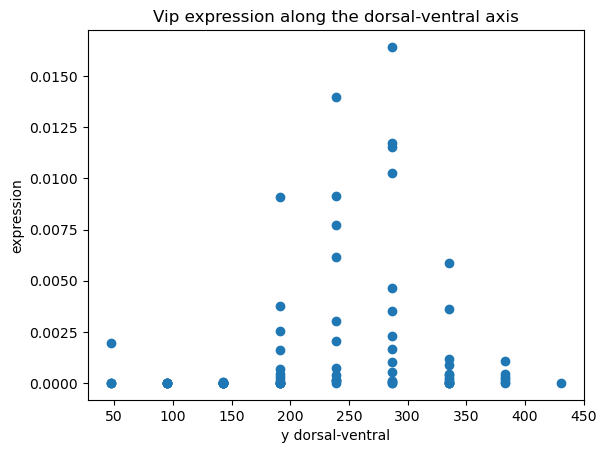

In [ ]:
# unbinned data
plt.scatter(adata.obs["z"], adata[:, "Vip"].X, cmap="viridis")
plt.xlabel("y dorsal-ventral")
plt.ylabel("expression")
plt.title("Vip expression along the dorsal-ventral axis")
plt.show()

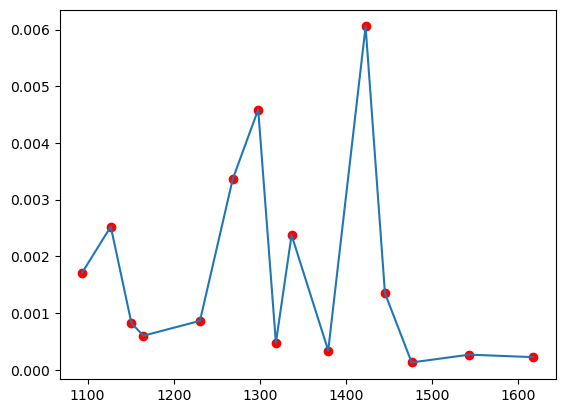

In [ ]:
y_bin, expr_bin = gene_binned(adata, "Vip", dim="x", num_bins=15)
plt.scatter(y_bin, expr_bin, c="r")
plt.plot(y_bin, expr_bin)

In [ ]:
n_bins = 5

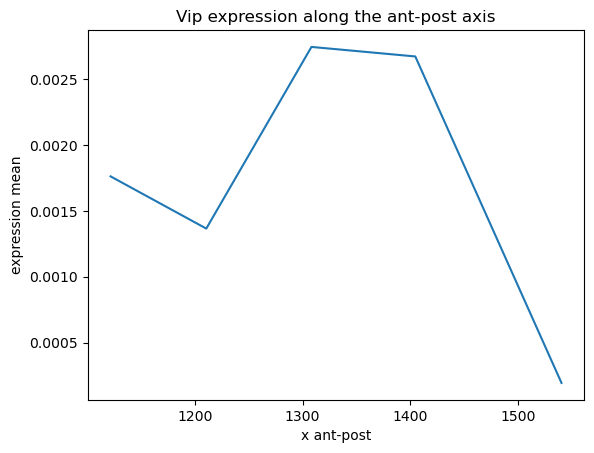

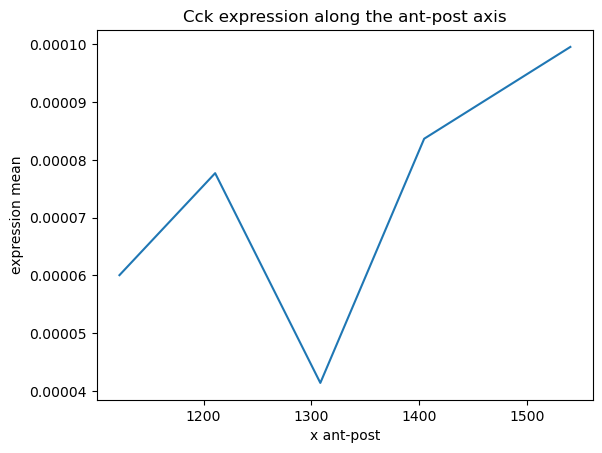

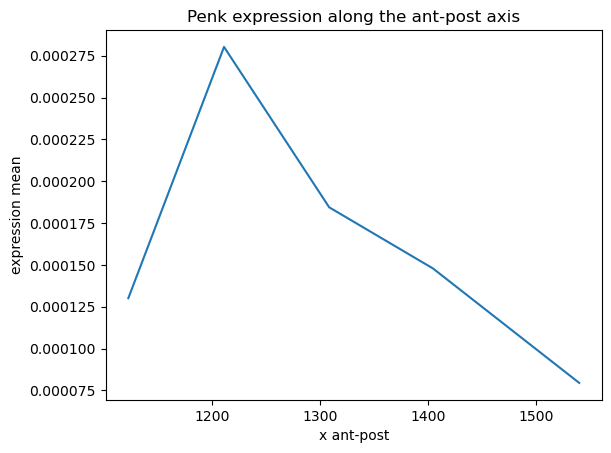

In [ ]:
adata[:, "Vip"].X

x, y = gene_binned(adata, "Vip", dim="x", num_bins=n_bins)
plt.plot(x, y)
plt.xlabel("x ant-post")
plt.ylabel("expression mean")
plt.title("Vip expression along the ant-post axis")
plt.show()

# same for gene Cck
x, y = gene_binned(adata, "Cck", dim="x", num_bins=n_bins)
plt.plot(x, y)
plt.xlabel("x ant-post")
plt.ylabel("expression mean")
plt.title("Cck expression along the ant-post axis")
plt.show()

# Penk
x, y = gene_binned(adata, "Penk", dim="x", num_bins=n_bins)
plt.plot(x, y)
plt.xlabel("x ant-post")
plt.ylabel("expression mean")
plt.title("Penk expression along the ant-post axis")
plt.show()

In [ ]:
coord[:, 1]
adata

View of AnnData object with n_obs × n_vars = 82 × 27462
    obs: 'x', 'y', 'z', 'counts'
    layers: 'counts', 'log_norm'

/var/folders/8w/hhwzbx0d6zg_2q5hrl31_yn00000gq/T/ipykernel_53911/970214165.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(coord[:,1], adata[:,'Vip'].X, cmap='viridis')


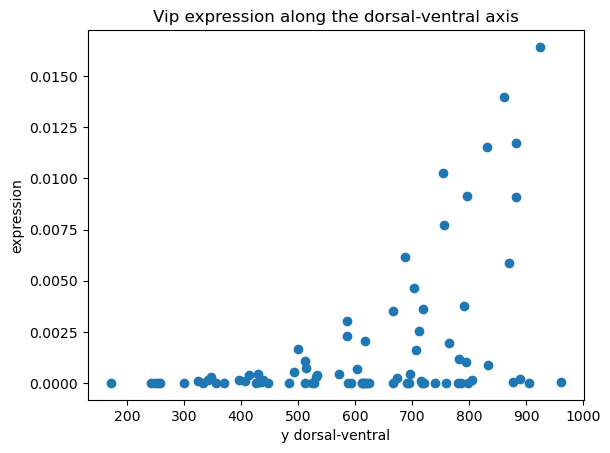

In [ ]:
# non-smoothed plot

plt.scatter(coord[:, 1], adata[:, "Vip"].X, cmap="viridis")
plt.xlabel("y dorsal-ventral")
plt.ylabel("expression")
plt.title("Vip expression along the dorsal-ventral axis")
plt.show()

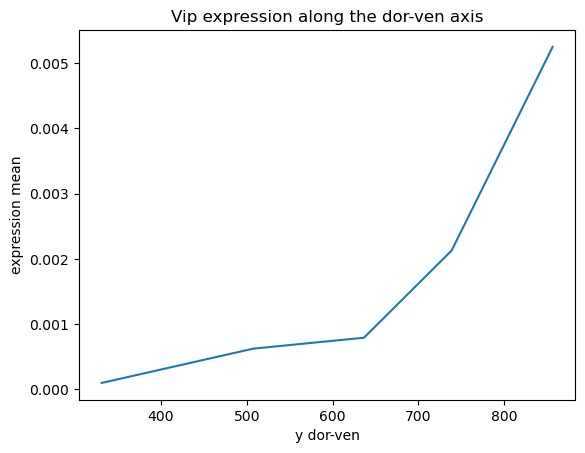

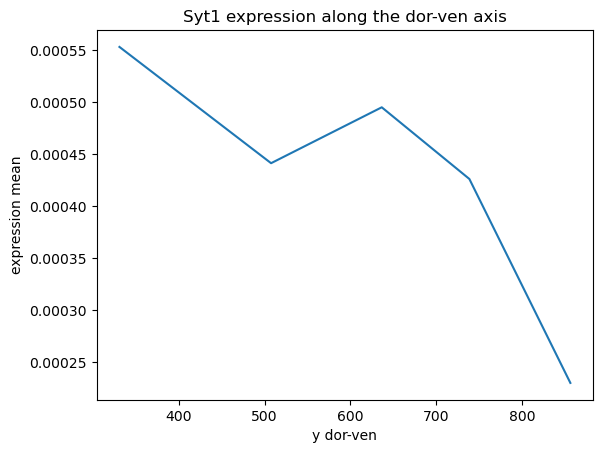

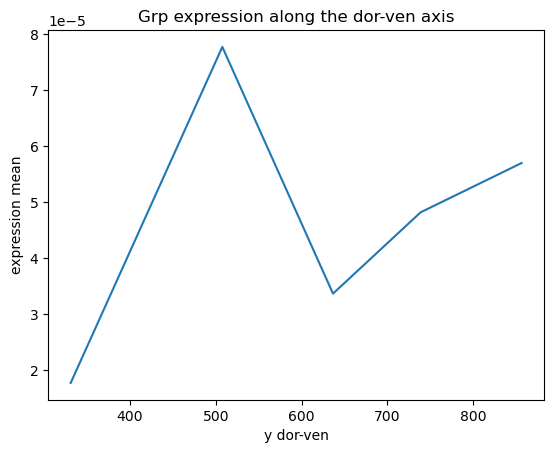

Text(0.5, 1.0, 'Avp expression along the dor-ven axis')

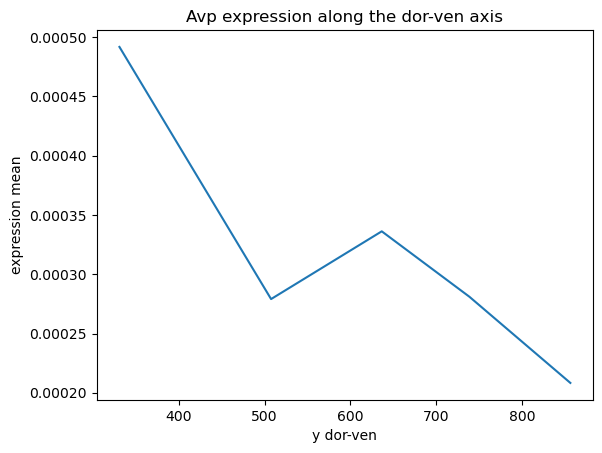

In [ ]:
# same plots  for the dorso-ventral axis
x, y = gene_binned(adata, "Vip", dim="y", num_bins=n_bins)
plt.plot(x, y)
plt.xlabel("y dor-ven")
plt.ylabel("expression mean")
plt.title("Vip expression along the dor-ven axis")
plt.show()

# Cck
# x,y= gene_binned(adata, 'Cck', dim='y', num_bins=n_bins)
# plt.plot(x, y)
# plt.xlabel('y dor-ven')
# plt.ylabel('expression mean')
# plt.title('Cck expression along the dor-ven axis')
# plt.show()

# Syt1
x, y = gene_binned(adata, "Syt1", dim="y", num_bins=n_bins)
plt.plot(x, y)
plt.xlabel("y dor-ven")
plt.ylabel("expression mean")
plt.title("Syt1 expression along the dor-ven axis")
plt.show()

# Grp
x, y = gene_binned(adata, "Grp", dim="y", num_bins=n_bins)
plt.plot(x, y)
plt.xlabel("y dor-ven")
plt.ylabel("expression mean")
plt.title("Grp expression along the dor-ven axis")
plt.show()
# Avp
x, y = gene_binned(adata, "Avp", dim="y", num_bins=n_bins)
plt.plot(x, y)
plt.xlabel("y dor-ven")
plt.ylabel("expression mean")
plt.title("Avp expression along the dor-ven axis")

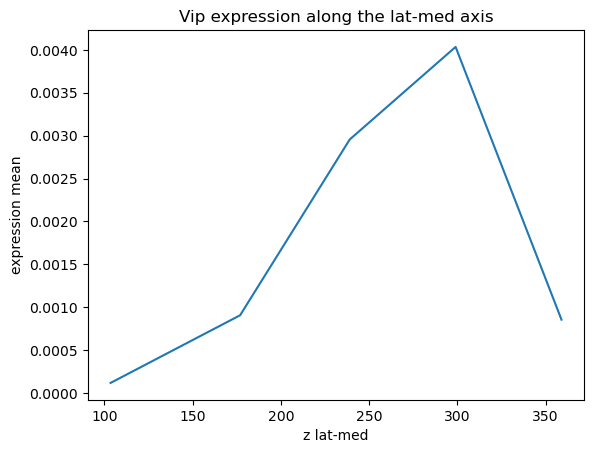

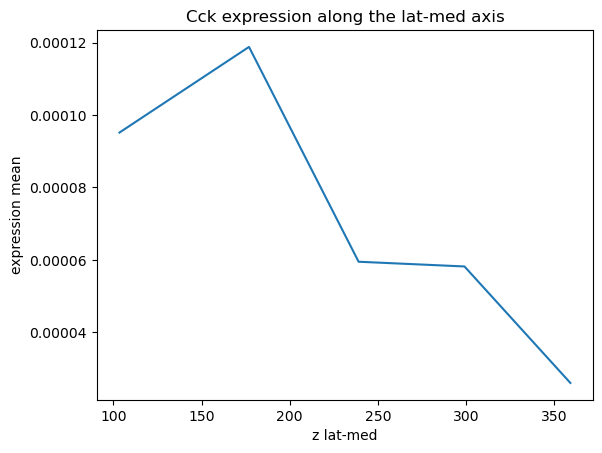

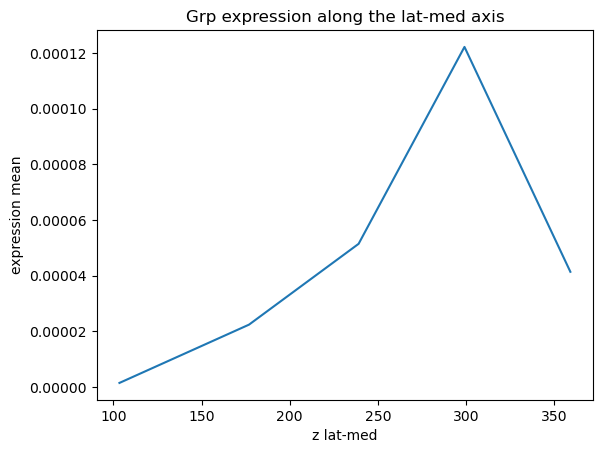

In [ ]:
# z axis plots
x, y = gene_binned(adata, "Vip", dim="z", num_bins=n_bins)
plt.plot(x, y)
plt.xlabel("z lat-med")
plt.ylabel("expression mean")
plt.title("Vip expression along the lat-med axis")
plt.show()

# Cck
x, y = gene_binned(adata, "Cck", dim="z", num_bins=n_bins)
plt.plot(x, y)
plt.xlabel("z lat-med")
plt.ylabel("expression mean")
plt.title("Cck expression along the lat-med axis")
plt.show()

# Grp
x, y = gene_binned(adata, "Grp", dim="z", num_bins=n_bins)
plt.plot(x, y)
plt.xlabel("z lat-med")
plt.ylabel("expression mean")
plt.title("Grp expression along the lat-med axis")
plt.show()

In [ ]:
zonated_genes = np.array(
    ["Vip", "Avp", "Prok2", "Penk", "Vipr2", "Avpr1a", "Prokr2", "Cck", "Grp", "Syt1"]
)

# create a sub dataset with only the zonated genes
z_data = adata[:, zonated_genes].X

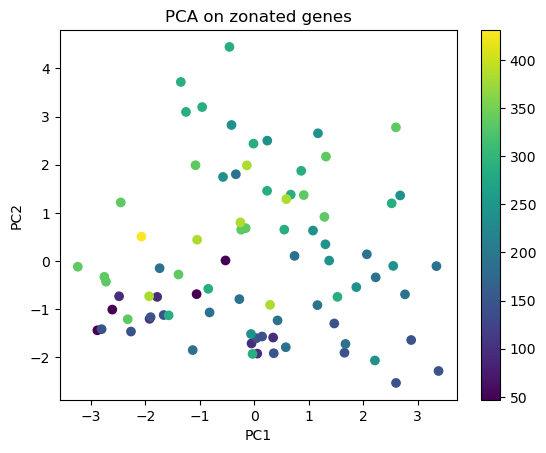

Text(0, 0.5, 'PC2')

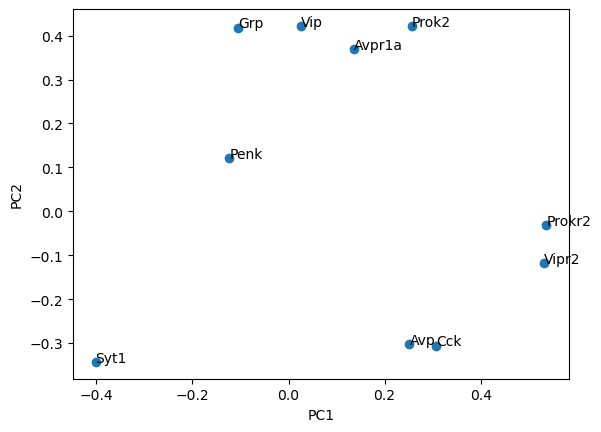

In [ ]:
# pca on the zonated genes
from sklearn.decomposition import PCA

# mean center the data
z_data = (z_data - np.mean(z_data, axis=0)) / np.std(z_data, axis=0)


pca = PCA(n_components=2)
pca.fit(z_data)
z_pca = pca.transform(z_data)
vec = pca.components_

# plot the pca
plt.scatter(z_pca[:, 0], z_pca[:, 1], c=adata.obs["z"], cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on zonated genes")
plt.colorbar()
plt.show()

# plot the principal components, with gene names, vec
# is the matrix of the principal components
plt.scatter(vec[0, :], vec[1, :])
# ad annotations with gene names
for i in range(len(zonated_genes)):
    plt.annotate(zonated_genes[i], (vec[0, i], vec[1, i]))

plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:
pca.components_


array([[ 0.02659212,  0.25157965,  0.25643625, -0.1235139 ,  0.53092247,
         0.13634148,  0.53670702,  0.30723893, -0.10456562, -0.40141436],
       [ 0.4220497 , -0.30301095,  0.42184594,  0.12114161, -0.1169121 ,
         0.36997863, -0.03095131, -0.30554478,  0.41829886, -0.34290956]])

In [ ]:
# an idea to study correlations with spatialpositions of gene  expression is to create
# a new dataframe with the expression of the genes of interest on the columns
# and the x values on the rows. In order to do so we need to reorder the rows of the df
# according to the x values, and in case of repeated x values, we need to take the mean


# plot of slices

In [ ]:
x_uniq


NameError: name 'x_uniq' is not defined

In [ ]:
# given a grid of point that i pass , that are the centers of some hexagons,
# I want to plot the hexagon around it, with a given radius


def plot_hexagon(x_center, y_center, size=1):
    for x, y in zip(x_center, y_center):
        angles = np.linspace(0, 2 * np.pi, 7)
        x_hexagon = x + size * np.cos(angles)
        y_hexagon = y + size * np.sin(angles)
        plt.plot(x_hexagon, y_hexagon, "b-")

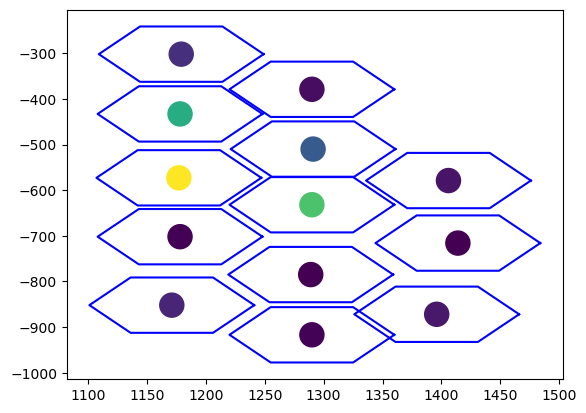

In [ ]:
# now I wanna plot the expression of a gene over a fixed slice
# it means I need to fix a value of x, than plot x andy, and add with colot the expression
# of the gene

fixed_x = x_uniq[6]
mask_slice = coord[:, 0] == fixed_x
slice = coord[mask_slice, :]

# plot the slice, color with Vip expression, every point with hegaon shape
# z vs y
plt.scatter(
    slice[:, 2], -slice[:, 1], c=adata[:, "Vip"].X[mask_slice], cmap="viridis", s=300
)
plot_hexagon(slice[:, 2], -slice[:, 1], size=70)
# plt.scatter( slice[:,1], slice[:,2], c=adata[:,'Vip'].X[mask_slice], cmap='viridis', s=300)
# plt.xlabel('y dor-ven')
# plt.ylabel('z lat-med')
plt.show()

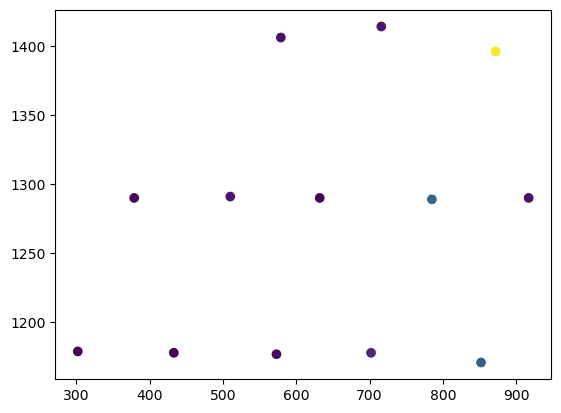

In [ ]:
# plot the slice, color with Cck expression
plt.scatter(slice[:, 1], slice[:, 2], c=adata[:, "Cck"].X[mask_slice], cmap="viridis")